In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import date
import requests
from io import BytesIO
from utils import tsplot

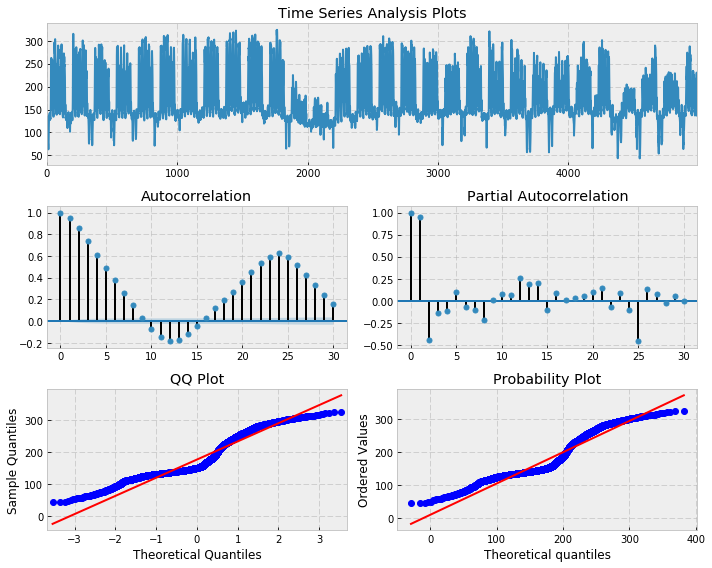

In [2]:
f = open('m.csv', 'rb').read()
data = f.decode().split('\n')
del data[-1]

start = date(2014,10,5)
start_winter_holidays = date(2014,12,20)
end_winter_holidays = date(2015,1,5)
start_easter_holidays = date(2015,4,4)
end_easter_holidays = date(2015,4,12)
end = date(2015,4,30)

start_w_holidays_index = (start_winter_holidays - start).days * 24
end_w_holidays_index = (end_winter_holidays - start).days * 24
start_e_holidays_index = (start_easter_holidays - start).days * 24
end_e_holidays_index = (end_easter_holidays - start).days * 24

serie_complete = pd.Series(data, dtype='float')
serie_sem1 = pd.Series(data[:start_w_holidays_index], dtype='float')
serie_whol = pd.Series(data[start_w_holidays_index:end_w_holidays_index], dtype='float')
serie_sem2_1 = pd.Series(data[end_w_holidays_index:start_e_holidays_index], dtype='float')
serie_ehol = pd.Series(data[start_e_holidays_index:end_e_holidays_index], dtype='float')
serie_sem2_2 = pd.Series(data[end_e_holidays_index:], dtype='float')

serie = serie_complete

tsplot(serie, lags=30)

## ARMA Example 1: Arma

In [3]:
# Fit the model
mod = sm.tsa.statespace.SARIMAX(serie.values, trend='c', order=(1,0,1))
res = mod.fit(disp=False)
print(res.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 4992
Model:               SARIMAX(1, 0, 1)   Log Likelihood              -21044.521
Date:                Mon, 24 Apr 2017   AIC                          42097.043
Time:                        16:44:31   BIC                          42123.105
Sample:                             0   HQIC                         42106.178
                               - 4992                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     14.4446      1.315     10.984      0.000      11.867      17.022
ar.L1          0.9181      0.007    139.237      0.000       0.905       0.931
ma.L1          0.3901      0.012     31.672      0.0

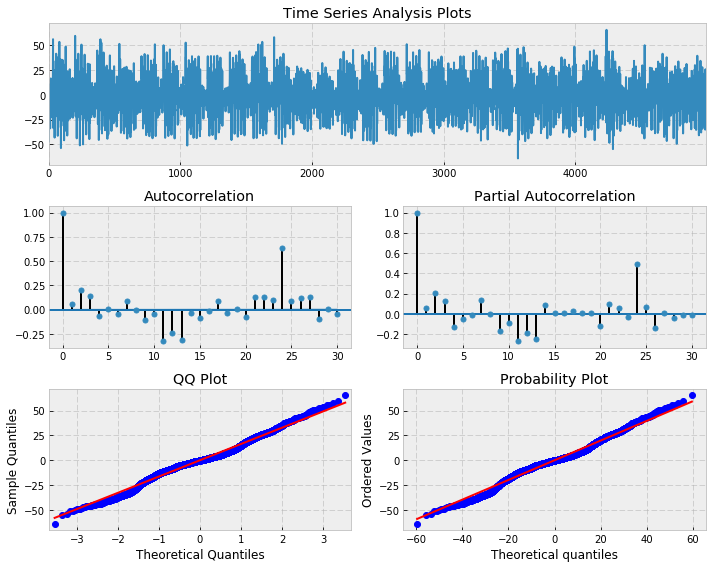

In [4]:
tsplot(res.resid, lags=30)

## ARMA Example 2: Arma with additive seasonal effects

In [5]:
ar = 1          # this is the maximum degree specification
ma = (1,0,0,1)  # this is the lag polynomial specification
mod = sm.tsa.statespace.SARIMAX(serie.values, trend='c', order=(ar,1,ma))
res = mod.fit(disp=False)
print(res.summary())

                             Statespace Model Results                            
Dep. Variable:                         y   No. Observations:                 4992
Model:             SARIMAX(1, 1, (1, 4))   Log Likelihood              -20835.014
Date:                   Mon, 24 Apr 2017   AIC                          41680.029
Time:                           16:44:44   BIC                          41712.607
Sample:                                0   HQIC                         41691.448
                                  - 4992                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0004      0.000     -1.251      0.211      -0.001       0.000
ar.L1          0.8563      0.010     89.476      0.000       0.838       0.875
ma.L1         -0.6522      0

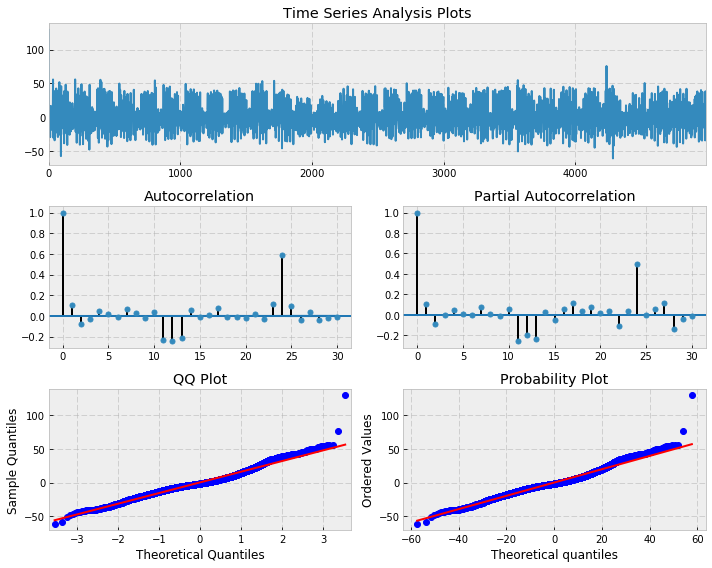

In [6]:
tsplot(res.resid, lags=30)

## ARIMA Example 3: Airline Model

In [7]:
mod = sm.tsa.statespace.SARIMAX(serie.values, order=(2,0,1), seasonal_order=(1,0,1,4))
res = mod.fit(disp=False)
print(res.summary())

/home/timon/anaconda3/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                
Dep. Variable:                                 y   No. Observations:                 4992
Model:             SARIMAX(2, 0, 1)x(1, 0, 1, 4)   Log Likelihood              -20824.194
Date:                           Mon, 24 Apr 2017   AIC                          41660.388
Time:                                   16:44:53   BIC                          41699.482
Sample:                                        0   HQIC                         41674.091
                                          - 4992                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6424      0.527      3.118      0.002       0.610       2.675
ar.L2         -0.7023      0.460     -1.526

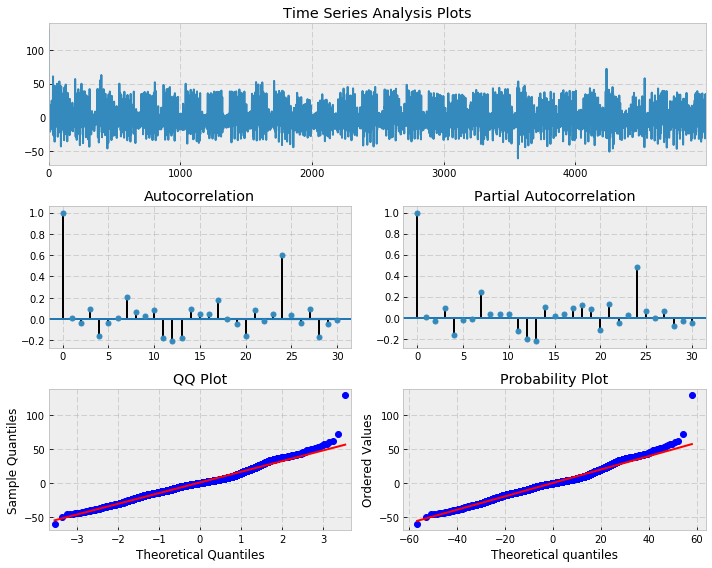

In [8]:
tsplot(res.resid, lags=30)

## ARIMA Example 4: ARMAX (Friedman)

## ARIMA Postestimation: Example 1 - Dynamic Forecasting

In [14]:
ynewpred = res.predict(start=len(serie.values),end=len(serie.values)+39)

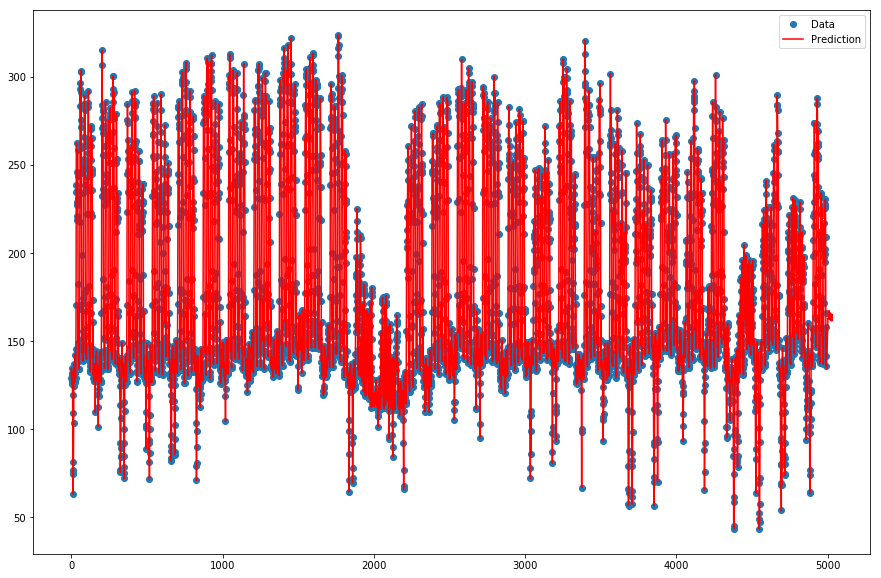

In [15]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(serie.values, 'o', label="Data")
ax.plot(np.hstack((serie.values, ynewpred)), 'r', label="Prediction")
ax.legend(loc="best");